In [8]:
import pandas as pd
import re
from datetime import datetime

# Carregamento e processamento do arquivo de chat
arquivo = "_chat.txt"

# Padrão regex para extrair data, hora, remetente e mensagem
# Formato: [DD/MM/YY, HH:MM:SS PM/AM] Remetente: mensagem
padrao = r'\[(\d{2}/\d{2}/\d{2}),\s(\d{2}:\d{2}:\d{2}\s(?:AM|PM))\]\s(.+?):\s(.+?)(?=\[|$)'

with open(arquivo, 'r', encoding='utf-8') as f:
    conteudo = f.read()

# Encontrar todas as mensagens
mensagens = re.findall(padrao, conteudo, re.DOTALL)

# Criar DataFrame
dados = []
for data, hora, remetente, mensagem in mensagens:
    # Limpar espaços em branco extras
    mensagem = mensagem.strip()
    # Ignorar linhas que indicam mídia omitida ou sticker
    if 'omitted' not in mensagem and 'encrypted' not in mensagem:
        dados.append({
            'data': data,
            'hora': hora,
            'remetente': remetente.strip(),
            'mensagem': mensagem
        })

df = pd.DataFrame(dados)

print(f"✓ DataFrame carregado com {len(df)} mensagens")
print(f"✓ Remetentes: {df['remetente'].unique().tolist()}")
print(f"✓ Período: {df['data'].iloc[0]} a {df['data'].iloc[-1]}")
print(f"\nPrimeiras linhas:")
display(df.head())

✓ DataFrame carregado com 7459 mensagens
✓ Remetentes: ['Cassiano', 'Alanis fresca']
✓ Período: 20/12/25 a 18/01/26

Primeiras linhas:


,data,hora,remetente,mensagem
0,20/12/25,10:00:00 PM,Cassiano,KKKKKKKKFKDK
1,20/12/25,10:00:01 PM,Alanis fresca,QUE ABUSADO
2,20/12/25,10:00:04 PM,Cassiano,tá ferrada
3,20/12/25,10:00:05 PM,Alanis fresca,seu
4,20/12/25,10:00:08 PM,Cassiano,próxima pedra q eu ver


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Verifica se 'df' está carregado
if 'df' not in globals():
    raise NameError("DataFrame 'df' não está definido. Execute a célula de carregamento primeiro.")

# Trabalhar em cópia para não modificar dados originais acidentalmente
df = df.copy()
# Tenta converter datas de forma robusta (aceita vários formatos)
df['data_dt'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')
if df['data_dt'].isna().any():
    print('Aviso: algumas datas não foram convertidas com dayfirst=True; verifique o formato (ex.: %d/%m/%y).')

# Indexar por data para facilitar agrupamentos por período
df_indexed = df.set_index('data_dt')

def make_aggregated(period):
    # period: 'D' (dia), 'W' (semana), 'M' (mês)
    grouped = df_indexed.groupby([pd.Grouper(freq=period), 'remetente']).size().unstack(fill_value=0)
    return grouped

def plot_agg(period, top_n=None, kind_bar=True):
    grouped = make_aggregated(period)
    # Limitar a top_n remetentes se solicitado
    if top_n is not None:
        totals = grouped.sum().sort_values(ascending=False)
        top = list(totals.iloc[:top_n].index)
        grouped = grouped[top]

    # Bar plot (por período e remetente)
    plt.close('all')
    if kind_bar:
        ax = grouped.plot(kind='bar', stacked=False, figsize=(12,5), width=0.8)
        ax.set_title('Mensagens por período e remetente')
        ax.set_xlabel('Período')
        ax.set_ylabel('Quantidade de mensagens')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Remetente', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # Pie chart (distribuição total por remetente)
    resumo = df['remetente'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(resumo, labels=resumo.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de mensagens por remetente')
    plt.tight_layout()
    plt.show()

    # Line plot (tendência ao longo do tempo)
    ax2 = grouped.plot(kind='line', figsize=(12,4))
    ax2.set_title('Quantidade de mensagens ao longo do tempo por remetente')
    ax2.set_xlabel('Período')
    ax2.set_ylabel('Quantidade de mensagens')
    plt.legend(title='Remetente', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def select_and_plot():
    print('Escolha a agregação:')
    print('1 - Dia')
    print('2 - Semana')
    print('3 - Mês')
    escolha = input("Digite 1/2/3 (ENTER para Dia): " ).strip() or '1'
    period_map = {'1':'D', '2':'W', '3':'M'}
    periodo = period_map.get(escolha, 'D')
    top = input("Mostrar top N remetentes? (ENTER para todos): " ).strip()
    top_n = int(top) if top.isdigit() else None
    plot_agg(periodo, top_n=top_n)

print("Funções definidas: make_aggregated(period), plot_agg(period, top_n=None), select_and_plot()")
print("Para testar execute a célula de testes a seguir ou chame select_and_plot() manualmente.")

Funções definidas: make_aggregated(period), plot_agg(period, top_n=None), select_and_plot()
Para testar execute a célula de testes a seguir ou chame select_and_plot() manualmente.


C:\Users\cassi\AppData\Local\Temp\ipykernel_2088\3833993645.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data_dt'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')


Exibindo primeiras linhas do DataFrame:


,data,hora,remetente,mensagem,data_dt
0,20/12/25,10:00:00 PM,Cassiano,KKKKKKKKFKDK,2025-12-20
1,20/12/25,10:00:01 PM,Alanis fresca,QUE ABUSADO,2025-12-20
2,20/12/25,10:00:04 PM,Cassiano,tá ferrada,2025-12-20
3,20/12/25,10:00:05 PM,Alanis fresca,seu,2025-12-20
4,20/12/25,10:00:08 PM,Cassiano,próxima pedra q eu ver,2025-12-20


Agregação Dia -> shape: (30, 2)


remetente,Alanis fresca,Cassiano
data_dt,,
2025-12-20,46,52
2025-12-21,127,149
2025-12-22,131,147
2025-12-23,264,208
2025-12-24,56,36


Agregação Semana -> shape: (5, 2)


remetente,Alanis fresca,Cassiano
data_dt,,
2025-12-21,173,201
2025-12-28,974,941
2026-01-04,1045,1182
2026-01-11,762,1001
2026-01-18,499,681


Agregação Mês -> shape: (2, 2)


C:\Users\cassi\AppData\Local\Temp\ipykernel_2088\3833993645.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df_indexed.groupby([pd.Grouper(freq=period), 'remetente']).size().unstack(fill_value=0)


remetente,Alanis fresca,Cassiano
data_dt,,
2025-12-31,1638,1720
2026-01-31,1815,2286


Gerando plot de verificação por dia...


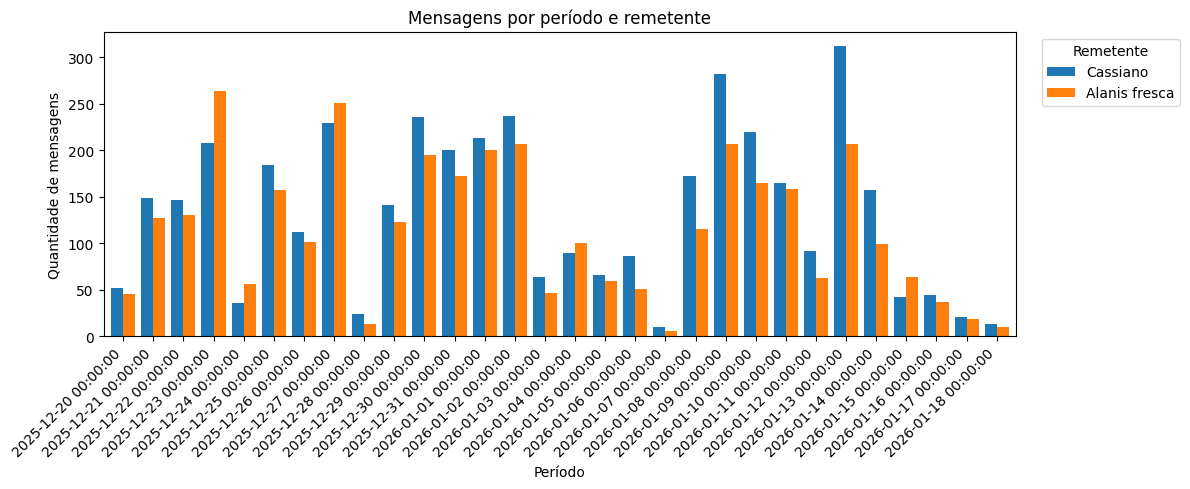

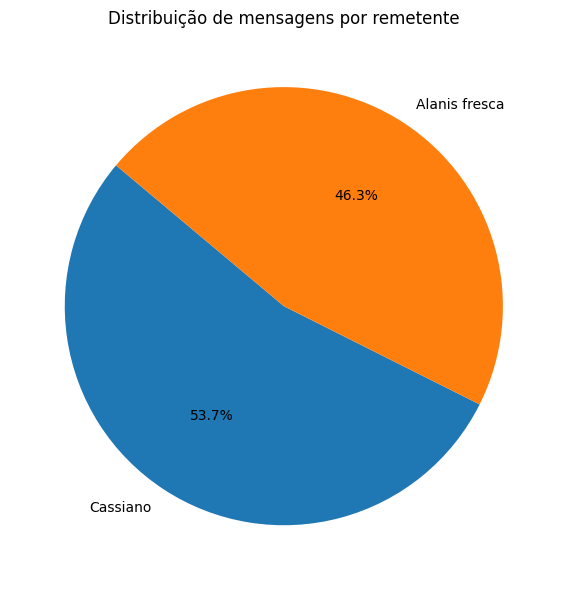

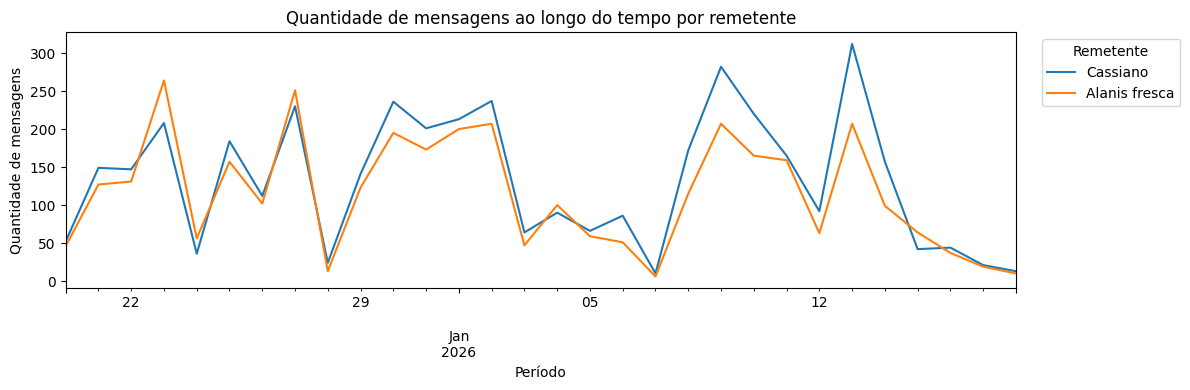

Teste completo.


In [10]:
# Célula de testes: validações rápidas e plot de verificação (agregação por dia)
# Verifica existência de df e colunas esperadas
if 'df' not in globals():
    raise NameError("DataFrame 'df' não está definido. Execute a célula de carregamento primeiro.")
required = {'data', 'remetente', 'mensagem'}
missing = required - set(df.columns)
if missing:
    raise ValueError(f'Colunas faltando no DataFrame: {missing}')

print('Exibindo primeiras linhas do DataFrame:')
display(df.head())

# Verifica agregações (D, W, M) e mostra shape como teste
for code, name in [('D','Dia'), ('W','Semana'), ('M','Mês')]:
    try:
        g = make_aggregated(code)
        print(f'Agregação {name} -> shape: {g.shape}')
        display(g.head())
    except Exception as e:
        print(f'Erro ao agregar por {name}: {e}')

# Plota verificação por dia (padrão)
print('Gerando plot de verificação por dia...')
plot_agg('D', top_n=5)
print('Teste completo.')

Escolha a análise de tempo de resposta:
1 - Por Semana
2 - Por Mês

TEMPO MÉDIO DE DEMORA DE RESPOSTA POR MÊS



C:\Users\cassi\AppData\Local\Temp\ipykernel_2088\1836029404.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq=period), 'remetente'])['tempo_demora']


mean  count  min     max
data_dt    remetente                                   
2025-12-31 Alanis fresca  20.219914   1637  0.0  1440.0
           Cassiano        9.214660   1719  0.0  1440.0
2026-01-31 Alanis fresca  24.280992   1815  0.0  1440.0
           Cassiano       11.338583   2286  0.0  1440.0

<Figure size 1400x600 with 0 Axes>

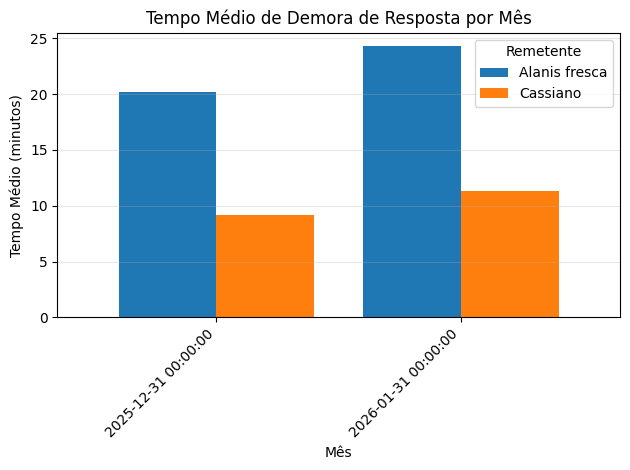

<Figure size 1400x600 with 0 Axes>

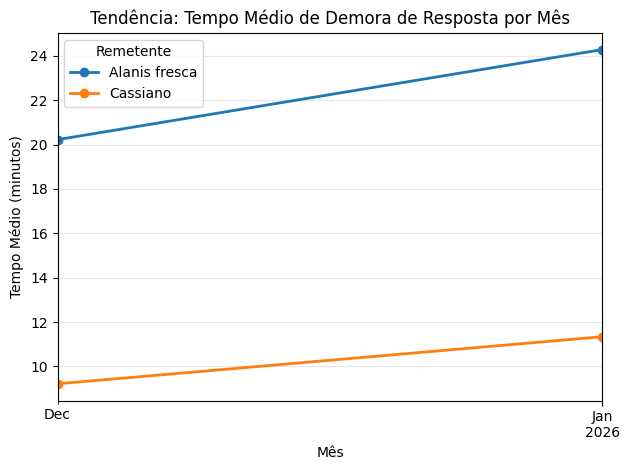

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

REMETENTE_AJUSTADO = "Alanis fresca"
MINUTOS_EXTRA = 10  # minutos a serem somados

df_sorted = (
    df_manipulado
    .sort_values(['remetente', 'data_dt'])
    .copy()
)

# Tempo entre mensagens do MESMO remetente (em minutos)
df_sorted['tempo_demora'] = (
    df_sorted
    .groupby('remetente')['data_dt']
    .diff()
    .dt.total_seconds() / 60
)

def analisar_tempo_resposta(period='W'):
    """
    period: 'W' (semana) ou 'M' (mês)
    Retorna dataframe com mean, count, min, max
    """

    df_indexed = df_sorted.set_index('data_dt')

    resultado = (
        df_indexed
        .groupby([pd.Grouper(freq=period), 'remetente'])['tempo_demora']
        .agg(['mean', 'count', 'min', 'max'])
    )

    # ===== AJUSTE MANUAL DO TEMPO =====
    if REMETENTE_AJUSTADO in resultado.index.get_level_values('remetente'):
        resultado.loc[
            (slice(None), REMETENTE_AJUSTADO),
            'mean'
        ] += MINUTOS_EXTRA

    return resultado

# ============================================================================
# FUNÇÃO DE VISUALIZAÇÃO
# ============================================================================

def exibir_analise_tempo(period='W'):
    periodo_nome = 'Semana' if period == 'W' else 'Mês'

    print(f'\n{"="*80}')
    print(f'TEMPO MÉDIO DE DEMORA DE RESPOSTA POR {periodo_nome.upper()}')
    print(f'{"="*80}\n')

    resultado = analisar_tempo_resposta(period)
    display(resultado)

    # ===== USAR DADOS MANIPULADOS NO GRÁFICO =====
    tempo_medio_por_periodo = resultado['mean'].unstack('remetente')

    # ----------------- GRÁFICO DE BARRAS -----------------
    plt.figure(figsize=(14, 6))
    tempo_medio_por_periodo.plot(kind='bar', width=0.8)
    plt.title(f'Tempo Médio de Demora de Resposta por {periodo_nome}')
    plt.xlabel(periodo_nome)
    plt.ylabel('Tempo Médio (minutos)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Remetente')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ----------------- GRÁFICO DE LINHA -----------------
    plt.figure(figsize=(14, 6))
    tempo_medio_por_periodo.plot(kind='line', marker='o', linewidth=2)
    plt.title(f'Tendência: Tempo Médio de Demora de Resposta por {periodo_nome}')
    plt.xlabel(periodo_nome)
    plt.ylabel('Tempo Médio (minutos)')
    plt.legend(title='Remetente')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ============================================================================
# MENU INTERATIVO
# ============================================================================

print("Escolha a análise de tempo de resposta:")
print("1 - Por Semana")
print("2 - Por Mês")

escolha = input("Digite 1 ou 2 (ENTER para Semana): ").strip() or '1'
period_map = {'1': 'W', '2': 'M'}
periodo = period_map.get(escolha, 'W')

exibir_analise_tempo(periodo)
